<a href="https://colab.research.google.com/github/rustyxlol/League-Match-Data/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import requests
import matplotlib.patches as mpatches
import time

In [7]:
headerList = ['gameId', 'gameDuration', 'team', 'champion', 'wins', 'kills', 'deaths', 'assists',
              'longestTimeSpentLiving', 'largestKillingSpree', 'largestMultiKill', 'killingSprees', 'doubleKills',
              'tripleKills', 'quadraKills', 'pentaKills', 'unrealKills', 'totalDamageDealt', 'magicDamageDealt',
              'physicalDamageDealt', 'trueDamageDealt', 'largestCriticalStrike', 'totalDamageDealtToChampions',
              'magicDamageDealtToChampions', 'physicalDamageDealtToChampions', 'trueDamageDealtToChampions',
              'totalHeal', 'damageDealtToTurrets', 'timeCCingOthers', 'totalDamageTaken', 'magicalDamageTaken',
              'physicalDamageTaken', 'trueDamageTaken', 'goldEarned', 'goldSpent', 'totalMinionsKilled', 'turretKills',
              'inhibitorKills']
API = ''


In [9]:
def get_player(cId, match_data):
    for i in range(10):
        if str(cId) == str(match_data['participants'][i]['championId']):
            return int(i)

In [10]:
def get_match_details(gameId):
    mURL = "https://euw1.api.riotgames.com/lol/match/v4/matches/" + str(
        gameId) + "?api_key="+API
    mResponse = requests.get(mURL)
    match_data = mResponse.json()
    return match_data

In [11]:
def get_stats(match_data, participant, championName, df, index):
    gameId = match_data['gameId']
    gameDuration = match_data['gameDuration']
    team = match_data['participants'][participant]['teamId']
    if team is 100:
        team = "blue"
    else:
        team = "red"
    wins = match_data['participants'][participant]['stats']['win']
    kills = match_data['participants'][participant]['stats']['kills']
    deaths = match_data['participants'][participant]['stats']['deaths']
    assists = match_data['participants'][participant]['stats']['assists']
    longestTimeSpentLiving = match_data['participants'][participant]['stats']['longestTimeSpentLiving']
    largestKillingSpree = match_data['participants'][participant]['stats']['largestKillingSpree']
    largestMultiKill = match_data['participants'][participant]['stats']['largestMultiKill']
    killingSprees = match_data['participants'][participant]['stats']['killingSprees']
    doubleKills = match_data['participants'][participant]['stats']['doubleKills']
    tripleKills = match_data['participants'][participant]['stats']['tripleKills']
    quadraKills = match_data['participants'][participant]['stats']['quadraKills']
    pentaKills = match_data['participants'][participant]['stats']['pentaKills']
    unrealKills = match_data['participants'][participant]['stats']['unrealKills']
    totalDamageDealt = match_data['participants'][participant]['stats']['totalDamageDealt']
    magicDamageDealt = match_data['participants'][participant]['stats']['magicDamageDealt']
    physicalDamageDealt = match_data['participants'][participant]['stats']['physicalDamageDealt']
    trueDamageDealt = match_data['participants'][participant]['stats']['trueDamageDealt']
    largestCriticalStrike = match_data['participants'][participant]['stats']['largestCriticalStrike']
    totalDamageDealtToChampions = match_data['participants'][participant]['stats']['totalDamageDealtToChampions']
    magicDamageDealtToChampions = match_data['participants'][participant]['stats']['magicDamageDealtToChampions']
    physicalDamageDealtToChampions = match_data['participants'][participant]['stats']['physicalDamageDealtToChampions']
    trueDamageDealtToChampions = match_data['participants'][participant]['stats']['trueDamageDealtToChampions']
    totalHeal = match_data['participants'][participant]['stats']['totalHeal']
    damageDealtToTurrets = match_data['participants'][participant]['stats']['damageDealtToTurrets']
    timeCCingOthers = match_data['participants'][participant]['stats']['timeCCingOthers']
    totalDamageTaken = match_data['participants'][participant]['stats']['totalDamageTaken']
    magicalDamageTaken = match_data['participants'][participant]['stats']['magicalDamageTaken']
    physicalDamageTaken = match_data['participants'][participant]['stats']['physicalDamageTaken']
    trueDamageTaken = match_data['participants'][participant]['stats']['trueDamageTaken']
    goldEarned = match_data['participants'][participant]['stats']['goldEarned']
    goldSpent = match_data['participants'][participant]['stats']['goldSpent']
    totalMinionsKilled = match_data['participants'][participant]['stats']['totalMinionsKilled']
    turretKills = match_data['participants'][participant]['stats']['turretKills']
    inhibitorKills = match_data['participants'][participant]['stats']['inhibitorKills']
    df.loc[index] = [gameId, gameDuration, team, championName, wins, kills, deaths, assists, longestTimeSpentLiving,
                   largestKillingSpree,
                   largestMultiKill, killingSprees, doubleKills, tripleKills, quadraKills, pentaKills, unrealKills,
                   totalDamageDealt, magicDamageDealt, physicalDamageDealt, trueDamageDealt, largestCriticalStrike,
                   totalDamageDealtToChampions, magicDamageDealtToChampions, physicalDamageDealtToChampions,
                   trueDamageDealtToChampions, totalHeal, damageDealtToTurrets, timeCCingOthers, totalDamageTaken,
                   magicalDamageTaken, physicalDamageTaken, trueDamageTaken, goldEarned, goldSpent, totalMinionsKilled,
                   turretKills, inhibitorKills]

In [12]:
requests.get("https://euw1.api.riotgames.com/lol/summoner/v4/summoners/by-name/Rusty+WD?api_key="+API)

<Response [200]>

In [14]:
aid = requests.get('https://euw1.api.riotgames.com/lol/summoner/v4/summoners/by-name/Rusty+WD?api_key='+API)
r = aid.json()
accountId= r['accountId']

In [17]:
mlist = requests.get('https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/'+accountId+'?queue=450&api_key='+API)
match_list_file = mlist.json()

In [18]:
df = pd.DataFrame(columns=headerList)

In [19]:
matches = match_list_file['matches']
champion_dict = requests.get("https://ddragon.leagueoflegends.com/cdn/11.6.1/data/en_US/champion.json").json()
id_to_name = {data["key"]: data["name"] for _, data in champion_dict["data"].items()}

In [21]:
for index, i in enumerate(matches):
    match_data = get_match_details(i['gameId'])
    participant = int(get_player(i['champion'], match_data))
    champion = str(i['champion'])
    championName = id_to_name[champion]
    print(championName)
    get_stats(match_data, participant, championName, df,index)
    print("Index: ", index, " Done")
    if index % 2 is 0:
        time.sleep(10)

Alistar
Index:  0  Done
Rammus
Index:  1  Done
Tristana
Index:  2  Done
Seraphine
Index:  3  Done
Sett
Index:  4  Done
Kayn
Index:  5  Done
Wukong
Index:  6  Done
Singed
Index:  7  Done
Brand
Index:  8  Done
Rumble
Index:  9  Done
Shen
Index:  10  Done
Alistar
Index:  11  Done
Janna
Index:  12  Done
Hecarim
Index:  13  Done
Lillia
Index:  14  Done
Kled
Index:  15  Done
Janna
Index:  16  Done
Lillia
Index:  17  Done
Rammus
Index:  18  Done
Rakan
Index:  19  Done
Master Yi
Index:  20  Done
Rakan
Index:  21  Done
Lux
Index:  22  Done
Leona
Index:  23  Done
Senna
Index:  24  Done
Janna
Index:  25  Done
Master Yi
Index:  26  Done
Twisted Fate
Index:  27  Done
Poppy
Index:  28  Done
Vel'Koz
Index:  29  Done
Rakan
Index:  30  Done
Vel'Koz
Index:  31  Done
Rakan
Index:  32  Done
Seraphine
Index:  33  Done
Vel'Koz
Index:  34  Done
Rakan
Index:  35  Done
Ekko
Index:  36  Done
Rakan
Index:  37  Done
Cho'Gath
Index:  38  Done
Vayne
Index:  39  Done
Veigar
Index:  40  Done
Nunu & Willump
Index:  41

In [22]:
pd.set_option('max_colwidth', 100)

df_import = df

In [23]:
df_import.columns

Index(['gameId', 'gameDuration', 'team', 'champion', 'wins', 'kills', 'deaths',
       'assists', 'longestTimeSpentLiving', 'largestKillingSpree',
       'largestMultiKill', 'killingSprees', 'doubleKills', 'tripleKills',
       'quadraKills', 'pentaKills', 'unrealKills', 'totalDamageDealt',
       'magicDamageDealt', 'physicalDamageDealt', 'trueDamageDealt',
       'largestCriticalStrike', 'totalDamageDealtToChampions',
       'magicDamageDealtToChampions', 'physicalDamageDealtToChampions',
       'trueDamageDealtToChampions', 'totalHeal', 'damageDealtToTurrets',
       'timeCCingOthers', 'totalDamageTaken', 'magicalDamageTaken',
       'physicalDamageTaken', 'trueDamageTaken', 'goldEarned', 'goldSpent',
       'totalMinionsKilled', 'turretKills', 'inhibitorKills'],
      dtype='object')

In [54]:
df_import

,gameId,gameDuration,team,champion,wins,kills,deaths,assists,longestTimeSpentLiving,largestKillingSpree,largestMultiKill,killingSprees,doubleKills,tripleKills,quadraKills,pentaKills,unrealKills,totalDamageDealt,magicDamageDealt,physicalDamageDealt,trueDamageDealt,largestCriticalStrike,totalDamageDealtToChampions,magicDamageDealtToChampions,physicalDamageDealtToChampions,trueDamageDealtToChampions,totalHeal,damageDealtToTurrets,timeCCingOthers,totalDamageTaken,magicalDamageTaken,physicalDamageTaken,trueDamageTaken,goldEarned,goldSpent,totalMinionsKilled,turretKills,inhibitorKills
0,5291661977,1034,red,Alistar,True,6,7,32,213,2,1,1,0,0,0,0,0,28623,24312,3626,685,0,14132,11615,1881,635,14192,396,55,31023,22899,7234,890,11585,11300,14,0,0
1,5289857804,1194,blue,Rammus,True,6,8,33,220,3,2,1,1,0,0,0,0,22818,19307,2516,995,58,14023,11625,1402,995,3965,479,41,28446,10085,17149,1211,12781,11400,11,0,0
2,5289874697,976,red,Tristana,True,5,5,16,404,3,1,1,0,0,0,0,0,39448,4973,30065,4410,472,11049,1398,9650,0,3010,3888,3,15832,12232,2687,913,10585,9950,32,4,0
3,5255930972,1307,blue,Seraphine,False,3,10,22,192,0,1,0,0,0,0,0,0,33872,29570,4194,108,0,13380,12221,1079,79,3443,267,53,20658,16416,2612,1630,12411,9450,25,0,0
4,5255770432,884,blue,Sett,False,3,8,11,290,2,1,1,0,0,0,0,0,25419,633,18301,6484,0,14655,633,8638,5383,710,0,21,23668,5389,17340,939,8615,7875,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5099453374,1213,red,Veigar,True,10,7,24,293,3,2,3,1,0,0,0,0,70587,68615,1971,0,5,16889,16292,596,0,5415,2532,48,29010,19223,8404,1382,14593,12550,62,0,0
96,5099189738,1226,blue,Zoe,False,14,5,16,309,4,3,3,2,1,0,0,0,70294,63028,5734,1532,0,38251,35976,893,1381,6116,165,42,18738,13419,4086,1232,14973,14335,48,0,0
97,5097605890,1154,blue,Trundle,True,6,4,15,478,2,1,2,0,0,0,0,0,19953,8445,10452,1055,20,9000,5549,2395,1055,11212,348,43,28663,6995,19260,2407,12403,10800,24,1,0
98,5097579916,864,red,Nautilus,False,0,6,8,183,0,0,0,0,0,0,0,0,7866,6070,1611,185,0,4427,3254,988,185,585,0,37,15819,8135,7462,221,7562,7100,4,0,0


In [24]:
df_import['champion'].value_counts()

Rakan             8
Master Yi         6
Seraphine         5
Zoe               4
Vayne             3
Brand             3
Rell              3
Janna             3
Vel'Koz           3
Hecarim           3
Leona             3
Galio             2
Ivern             2
Veigar            2
Nautilus          2
Twisted Fate      2
Alistar           2
Rammus            2
Singed            2
Trundle           2
Poppy             2
Wukong            2
Jhin              2
Heimerdinger      2
Lillia            2
Senna             2
Taric             1
Ekko              1
Sion              1
Cho'Gath          1
Lux               1
Sylas             1
Kindred           1
Skarner           1
Viego             1
Sejuani           1
Rumble            1
Diana             1
Nunu & Willump    1
Ashe              1
Tristana          1
Malphite          1
Lulu              1
Kled              1
Varus             1
Shen              1
Talon             1
Pyke              1
Kayn              1
Sett              1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


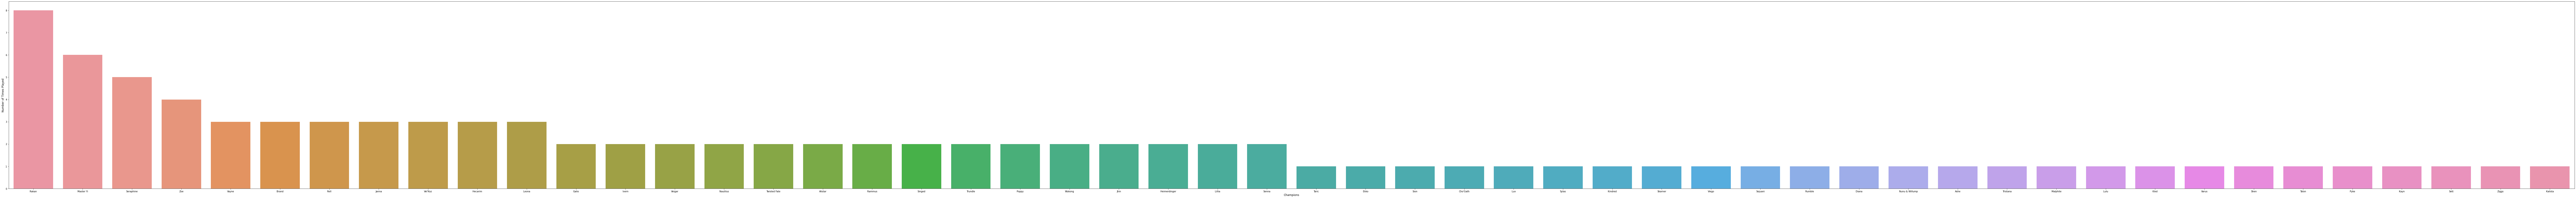

In [25]:
cnt_srs = df_import['champion'].value_counts()

plt.figure(figsize=(200,15))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=1)
plt.ylabel('Number of Times Played', fontsize=12)
plt.xlabel('Champions', fontsize=12)
plt.show()

(('Rakan', 8), ('Master Yi', 6), ('Seraphine', 5), ('Zoe', 4), ('Vayne', 3), ('Brand', 3), ('Rell', 3), ('Janna', 3), ("Vel'Koz", 3), ('Hecarim', 3), ('Leona', 3), ('Galio', 2), ('Ivern', 2), ('Veigar', 2), ('Nautilus', 2), ('Twisted Fate', 2), ('Alistar', 2), ('Rammus', 2), ('Singed', 2), ('Trundle', 2), ('Poppy', 2), ('Wukong', 2), ('Jhin', 2), ('Heimerdinger', 2), ('Lillia', 2), ('Senna', 2), ('Taric', 1), ('Ekko', 1), ('Sion', 1), ("Cho'Gath", 1), ('Lux', 1), ('Sylas', 1), ('Kindred', 1), ('Skarner', 1), ('Viego', 1), ('Sejuani', 1), ('Rumble', 1), ('Diana', 1), ('Nunu & Willump', 1), ('Ashe', 1), ('Tristana', 1), ('Malphite', 1), ('Lulu', 1), ('Kled', 1), ('Varus', 1), ('Shen', 1), ('Talon', 1), ('Pyke', 1), ('Kayn', 1), ('Sett', 1), ('Ziggs', 1), ('Kalista', 1))


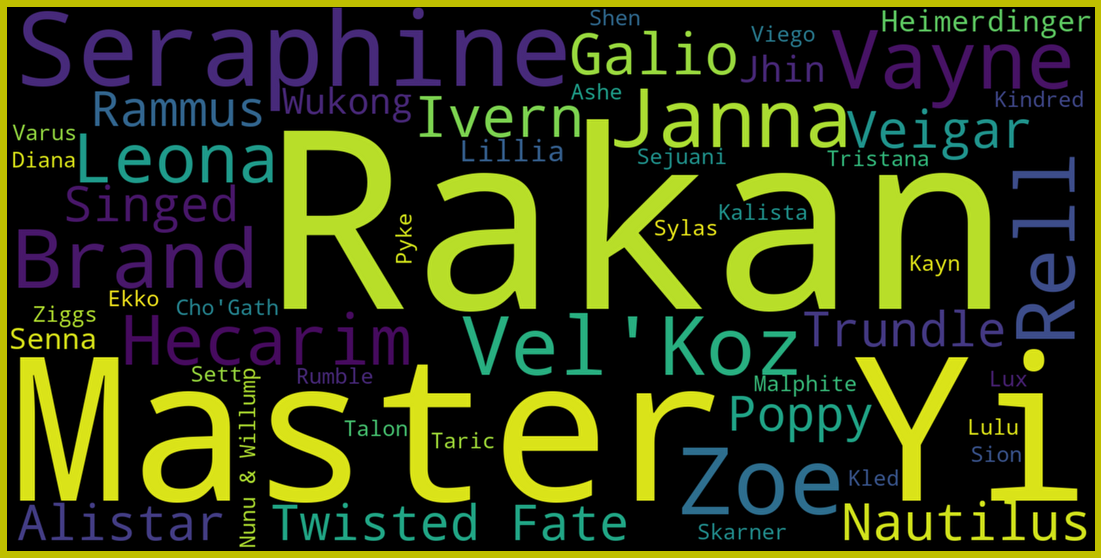

In [26]:
tuples = tuple([tuple(x) for x in df_import.champion.value_counts().reset_index().values])
print (tuples)
wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(dict(tuples))
plt.figure( figsize=(30,10), facecolor='y')
plt.imshow(wordcloud, interpolation="bessel")
plt.axis("off")
plt.show()


In [55]:
cnt_srs

Rakan             8
Master Yi         6
Seraphine         5
Zoe               4
Vayne             3
Brand             3
Rell              3
Janna             3
Vel'Koz           3
Hecarim           3
Leona             3
Galio             2
Ivern             2
Veigar            2
Nautilus          2
Twisted Fate      2
Alistar           2
Rammus            2
Singed            2
Trundle           2
Poppy             2
Wukong            2
Jhin              2
Heimerdinger      2
Lillia            2
Senna             2
Taric             1
Ekko              1
Sion              1
Cho'Gath          1
Lux               1
Sylas             1
Kindred           1
Skarner           1
Viego             1
Sejuani           1
Rumble            1
Diana             1
Nunu & Willump    1
Ashe              1
Tristana          1
Malphite          1
Lulu              1
Kled              1
Varus             1
Shen              1
Talon             1
Pyke              1
Kayn              1
Sett              1


In [56]:
champGamesList = []
champNameList = [k for k, v in cnt_srs.items()]
for i in range(len(cnt_srs)):
  champGamesList.append(cnt_srs[i])

In [71]:
df_import[['champion', 'wins']].value_counts()['Rakan',True]

4

In [70]:
champWinList = []
for i in champNameList:
  try:
    champWinList.append(df_import.value_counts(['champion','wins'])[i,True])
  except KeyError:
    champWinList.append(0)

In [72]:
champLossList = []
for i in champNameList:
  try:
    champLossList.append(df_import.value_counts(['champion','wins'])[i,False])
  except KeyError:
    champLossList.append(0)

In [73]:
champLossList

[4,
 3,
 2,
 4,
 2,
 2,
 1,
 1,
 0,
 3,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1]

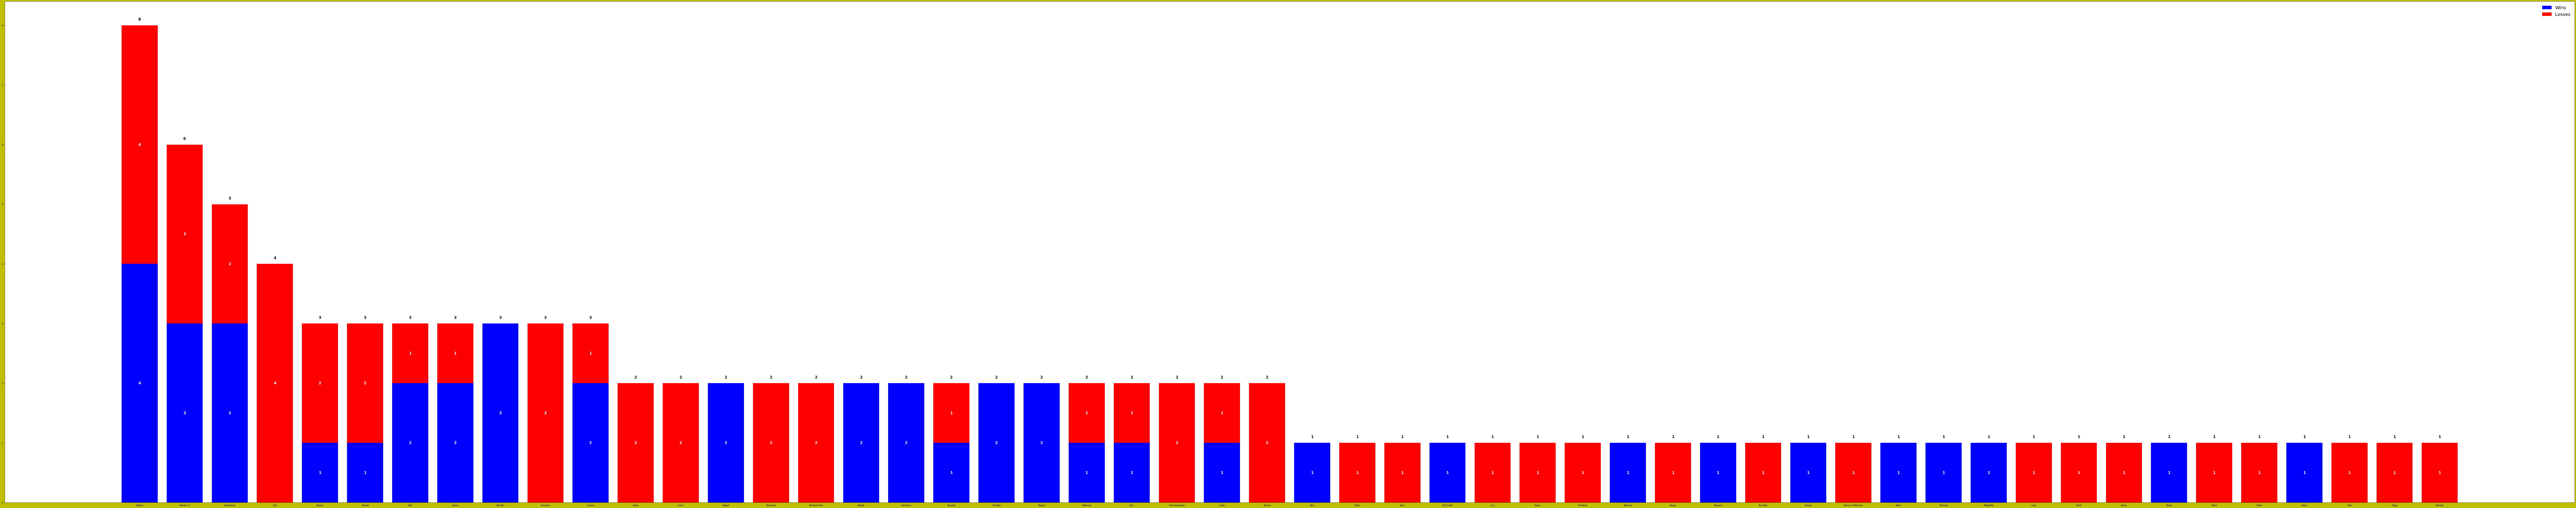

In [81]:
plt.figure( figsize=(200,40), facecolor='y')
winbar = plt.bar(champNameList, champWinList, color='b')
lossbar = plt.bar(champNameList, champLossList, bottom=champWinList, color='r')
red_patch = mpatches.Patch(color='red', label='Losses')
blue_patch = mpatches.Patch(color='blue', label='Wins')
plt.legend(handles=[blue_patch,red_patch],fontsize = '20')

for r1, r2 in zip(winbar, lossbar):
    h1 = r1.get_height()
    h2 = r2.get_height()
    if h1 > 0:
      plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    if h2 > 0:
      plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + 0.1, "%d" % (h1+h2), ha="center", va="center", color="black", fontsize=16, fontweight="bold")


plt.show()